In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_path = "data/city_data.csv"
ride_path = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
#Average Fare Per City
average_fare = combined_data.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare)
average_fare.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [4]:
#Total Number of Rides Per City
total_rides = combined_data.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides)
total_rides.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [5]:
#Total Number of Drivers Per City
total_drivers = combined_data[["city", "driver_count"]].drop_duplicates("city")
total_drivers.head()

,city,driver_count
0,Lake Jonathanshire,5
1,South Michelleport,72
2,Port Samanthamouth,57
3,Rodneyfort,34
4,South Jack,46


In [6]:
#City Type (Urban, Suburban, Rural)
city_type = combined_data[["city", "type"]].drop_duplicates("city")
city_type.head()

,city,type
0,Lake Jonathanshire,Urban
1,South Michelleport,Urban
2,Port Samanthamouth,Urban
3,Rodneyfort,Urban
4,South Jack,Urban


In [7]:
combined_df = pd.merge(average_fare, total_rides, how="outer", on="city")
combined_df = pd.merge(combined_df, total_drivers, how="outer", on = "city")
combined_df = pd.merge(combined_df, city_type, how="outer", on = "city")
combined_df = combined_df.set_index("city")
combined_df.head()

,fare,ride_id,driver_count,type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [8]:
urban_df = combined_df[combined_df["type"] == "Urban"]
suburban_df = combined_df[combined_df["type"] == "Suburban"]
rural_df = combined_df[combined_df["type"] == "Rural"]
urban_df.head()

,fare,ride_id,driver_count,type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Carriemouth,28.314444,27,52,Urban
Christopherfurt,24.501852,27,41,Urban
Deanville,25.842632,19,49,Urban


## Bubble Plot of Ride Sharing Data

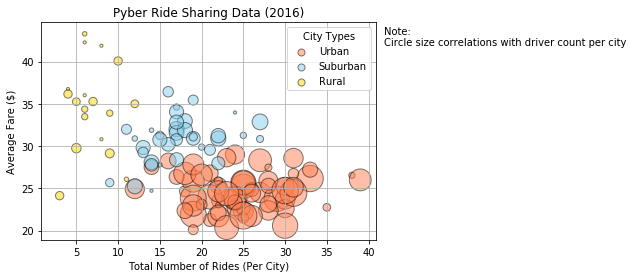

In [9]:
# Obtain the x and y coordinates for each of the three city types
x_urban = urban_df["ride_id"]
y_urban = urban_df["fare"]
z_urban = urban_df["driver_count"]

x_suburban = suburban_df["ride_id"]
y_suburban = suburban_df["fare"]
z_suburban = suburban_df["driver_count"]

x_rural = rural_df["ride_id"]
y_rural = rural_df["fare"]
z_rural = rural_df["driver_count"]

# Build the scatter plots for each city types
p1 = plt.scatter(x_urban,y_urban, s= 10*z_urban, label="Urban", c="coral",alpha = 0.5, edgecolor = "black", linewidths = 1)
p2 = plt.scatter(x_suburban,y_suburban, s= 10*z_suburban, label="Suburban", c="skyblue", alpha = 0.5, edgecolor = "black", linewidths = 1)
p3 = plt.scatter(x_rural,y_rural, s= 10*z_rural, label="Rural", c="gold", alpha = 0.5, edgecolor = "black", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(title = "City Types")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
plt.grid(True)

# Incorporate a text label regarding circle size
plt.figtext(0.92, 0.8, r"Note:"
            "\n"
           r"Circle size correlations with driver count per city")

# Save Figure
plt.savefig("Bubble_Plot_of_Ride_Sharing_Data")

plt.show()

## Total Fares by City Type

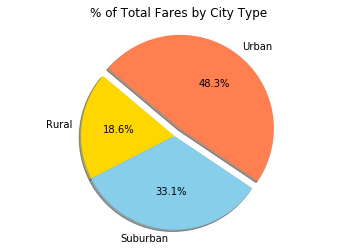

In [10]:
# Calculate Type Percents
type_percents = combined_df.groupby(["type"])
total_fares = type_percents["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total_Fares_by_City_Type")

plt.show()

Please note that Urban has collected most fares compared to Suburban and Rural. Urban earned 48.3% of the total fares.

## Total Rides by City Type

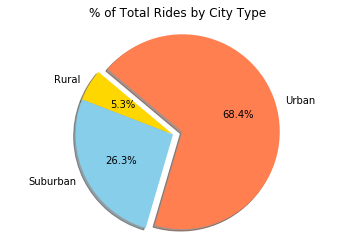

In [11]:
# Calculate Ride Percents
total_ride = type_percents["ride_id"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(total_ride, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total_Rides_by_City_Type")

# Show Figure
plt.show()

Most of rides are occured in Urban which is about 68.4% of the total rides. That is almost triple of Suburban and 15 times of Rural.

## Total Drivers by City Type

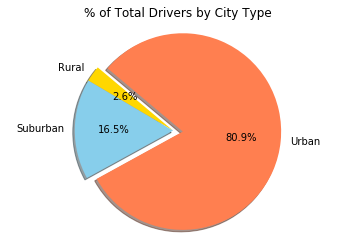

In [12]:
# Calculate Driver Percents
total_drivers = type_percents["driver_count"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total_Drivers_by_City_Type")

# Show Figure
plt.show()


Please note that most of drivers drive in Urban area which is about 80.9%. This outcome sounds reasonable since most of rides were occured in Urban area.